<a href="https://colab.research.google.com/github/Yash-Kamtekar/Deep_learning_assignment_3/blob/main/3_layer_deep_neural_network_for_non_linear_regression_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3 layer Neural Network using Pytorch tensor builtin functionality of modules**

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import math

In [ ]:
n = 200
d = 3
x = torch.rand(n,d)
weights_true = torch.tensor([[2, 1,-1],[3,0,-1]]).T
bias_true = torch.tensor([[0.5],[0.1]])

y_true = torch.matmul((x ** 2).float() , weights_true.float()) + torch.matmul(x.float() , weights_true.float()) + bias_true.T.float()
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2, 1]), y: torch.Size([200, 2])


In [ ]:
view = TSNE(n_components=2, n_jobs=5).fit_transform(x)
view.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(200, 2)

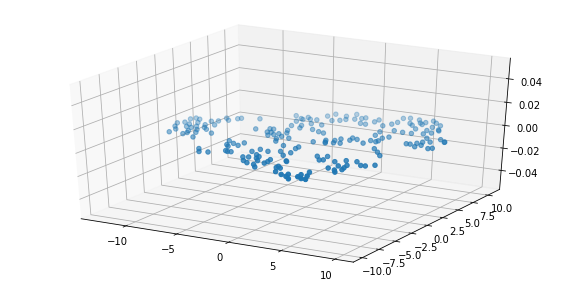

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(10,5))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

In [ ]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 4)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(6.1176, grad_fn=<MseLossBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



**Test just one forward and backward step**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(6.1176, grad_fn=<MseLossBackward0>)
tensor(5.1876, grad_fn=<MseLossBackward0>)


In [ ]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  tsne = fig.add_subplot(111, projection='3d')
  tsne.scatter(x[:, 0], x[:, 1], y[:, 0], label='underlying function')
  if y_pred is not None:
    tsne.scatter(x[:, 0], x[:, 1], y_pred[:, 0], label='our function')
  plt.legend()

tensor(5.1876, grad_fn=<MseLossBackward0>)
tensor(4.3222, grad_fn=<MseLossBackward0>)
tensor(3.5230, grad_fn=<MseLossBackward0>)
tensor(2.8478, grad_fn=<MseLossBackward0>)
tensor(2.3740, grad_fn=<MseLossBackward0>)
tensor(2.1100, grad_fn=<MseLossBackward0>)
tensor(1.9795, grad_fn=<MseLossBackward0>)
tensor(1.9012, grad_fn=<MseLossBackward0>)
tensor(1.8355, grad_fn=<MseLossBackward0>)
tensor(1.7716, grad_fn=<MseLossBackward0>)
tensor(1.7073, grad_fn=<MseLossBackward0>)
tensor(1.6422, grad_fn=<MseLossBackward0>)
tensor(1.5767, grad_fn=<MseLossBackward0>)
tensor(1.5106, grad_fn=<MseLossBackward0>)
tensor(1.4438, grad_fn=<MseLossBackward0>)
tensor(1.3769, grad_fn=<MseLossBackward0>)
tensor(1.3106, grad_fn=<MseLossBackward0>)
tensor(1.2448, grad_fn=<MseLossBackward0>)
tensor(1.1796, grad_fn=<MseLossBackward0>)
tensor(1.1150, grad_fn=<MseLossBackward0>)
tensor(1.0514, grad_fn=<MseLossBackward0>)
tensor(0.9891, grad_fn=<MseLossBackward0>)
tensor(0.9282, grad_fn=<MseLossBackward0>)
tensor(0.86

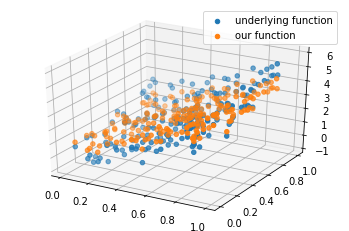

In [ ]:
from typing import Callable

def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())